In [18]:

# Análisis de datos Properati 2019


### 1 - Pre procesamiento



In [102]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from datetime import timedelta, date
import matplotlib.dates as mdates
import geopandas as gpd
import shapely
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [114]:
properties = pd.read_csv('data/ar_properties.csv')

In [115]:
#### Informacion del dataset sin modificaciones
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430494 entries, 0 to 430493
Data columns (total 25 columns):
id                 430494 non-null object
ad_type            430494 non-null object
start_date         430494 non-null object
end_date           430494 non-null object
created_on         430494 non-null object
lat                371707 non-null float64
lon                371707 non-null float64
l1                 430494 non-null object
l2                 430494 non-null object
l3                 416594 non-null object
l4                 131306 non-null object
l5                 3195 non-null object
l6                 0 non-null float64
rooms              262140 non-null float64
bedrooms           184448 non-null float64
bathrooms          328119 non-null float64
surface_total      354623 non-null float64
surface_covered    327228 non-null float64
price              403420 non-null float64
currency           398963 non-null object
price_period       205273 non-null object
title

In [116]:
#### Eliminamos propiedades duplicadas y que no tengan precio
properties.drop_duplicates(inplace=True)
properties.dropna(subset=['price'], inplace=True)
properties.dropna(subset=['bathrooms'], inplace=True)

#### Nos interesan solo propiedades de argentina
condicion = properties[ properties['l1'] != 'Argentina' ].index
properties.drop(condicion , inplace=True)

#### Eliminamos columnas que no nos interesan para el analisis
properties = properties.drop(columns=['l4', 'l5','l6','id','ad_type','created_on'])


#### Nos interesan solo los valores en dolares
condicion2 = properties[ properties['currency'] != 'USD' ].index
properties.drop(condicion2 , inplace=True)

#### Nos interesan solo propiedades en capital
condicion3 = properties[ properties['l2'] != 'Capital Federal' ].index
properties.drop(condicion3 , inplace=True)

#### Nos interesan solo propiedades en venta
condicion4 = properties[ properties['operation_type'] != 'Venta' ].index
properties.drop(condicion4 , inplace=True)


In [117]:
#### Ya sabemos que son de Argentina y capital, asi que eliminamos esos campos, al igual que currency, es todo en dolares
properties = properties.drop(columns=['l1', 'l2','currency', 'price_period'])


prop_clean = properties.rename(columns={'l3': 'barrio'})


In [111]:
properties.operation_type.unique()

array(['Venta'], dtype=object)

In [118]:
prop_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74216 entries, 325 to 427902
Data columns (total 15 columns):
start_date         74216 non-null object
end_date           74216 non-null object
lat                70538 non-null float64
lon                70538 non-null float64
barrio             73901 non-null object
rooms              65610 non-null float64
bedrooms           44537 non-null float64
bathrooms          74216 non-null float64
surface_total      71359 non-null float64
surface_covered    72165 non-null float64
price              74216 non-null float64
title              74216 non-null object
description        74216 non-null object
property_type      74216 non-null object
operation_type     74216 non-null object
dtypes: float64(8), object(7)
memory usage: 9.1+ MB


In [119]:
prop_clean.to_csv('datosCapital.csv')

In [67]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93982 entries, 325 to 427904
Data columns (total 19 columns):
start_date         93982 non-null object
end_date           93982 non-null object
lat                89327 non-null float64
lon                89327 non-null float64
l1                 93982 non-null object
l2                 93982 non-null object
l3                 93496 non-null object
rooms              73219 non-null float64
bedrooms           48762 non-null float64
bathrooms          81263 non-null float64
surface_total      88269 non-null float64
surface_covered    85336 non-null float64
price              93982 non-null float64
currency           93982 non-null object
price_period       43223 non-null object
title              93971 non-null object
description        93982 non-null object
property_type      93982 non-null object
operation_type     93982 non-null object
dtypes: float64(8), object(11)
memory usage: 14.3+ MB


In [ ]:
### 2 - Analisis por provincia

TypeError: object of type 'float' has no len()

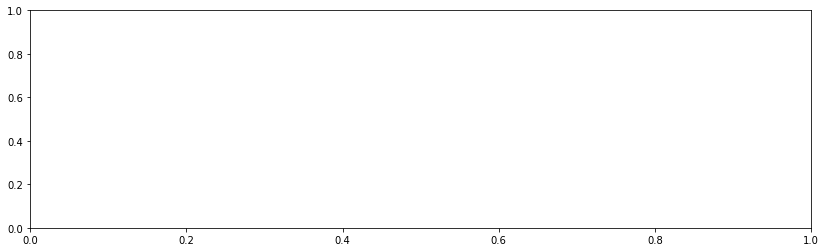

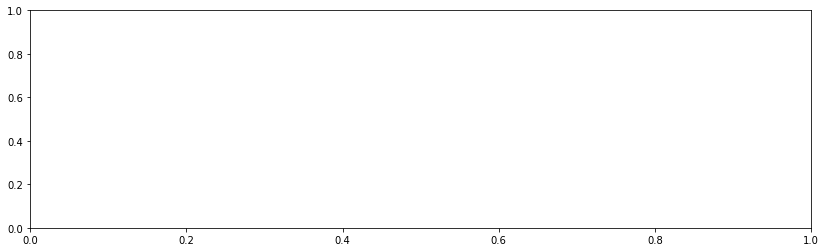

In [56]:
properties['provincia']= properties.l2.str.upper().copy()

#Cantidad de propiedas por provincia
propiedadesPorProvincia=properties.groupby('provincia')
plot= propiedadesPorProvincia.plot(kind='bar',figsize=(14,4),color=(0.9,0.3,0.3))
plot.set_title('Top 20', fontsize=18);
plot.set_xlabel('Provincia', fontsize=18);
plot.set_ylabel('Precio del m2 (Dolares)', fontsize=16);

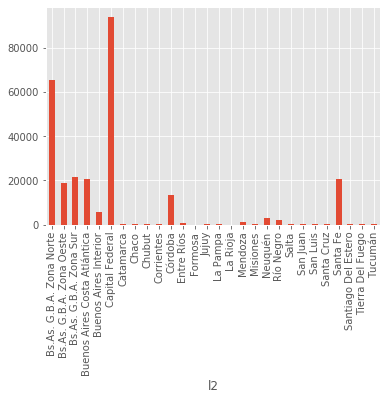

In [61]:
import matplotlib
matplotlib.style.use('ggplot')
properties.groupby(['l2']).agg(np.size)['l1'].plot(kind='bar')
plt.show()